In [1]:
import pandas as pd

train = pd.read_csv('train_users_2.csv')
test = pd.read_csv('test_users.csv')
countries = pd.read_csv('countries.csv')
sessions = pd.read_csv('sessions.csv')

In [2]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [4]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06


In [5]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

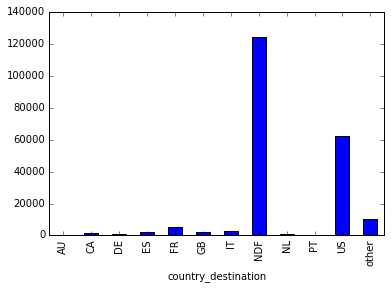

In [7]:
# распределение по странам
train.pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

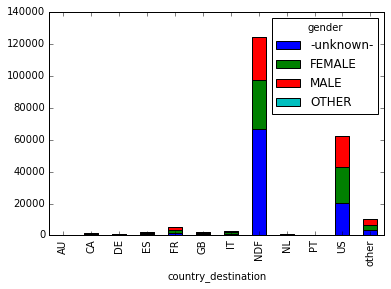

In [12]:
# распределение по странам
train.pivot_table('id', 'country_destination', 'gender', aggfunc='count').plot(kind='bar', stacked=True)

In [13]:
# заготовка для результатов
result = pd.DataFrame()
result['id'] = test.id

In [14]:
result['country'] = 'NDF' 

In [15]:
result.to_csv('ans.csv', index=False)

In [16]:
# удалим поля
drop_fields = ['date_account_created', 'timestamp_first_active', 'date_first_booking', 'signup_method', 'signup_flow',
              'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type',
               'first_browser']

In [17]:
test = test.drop(drop_fields, axis=1)
train = train.drop(drop_fields, axis=1)

In [19]:
# возраст заменяем средним
test.age[test.age.isnull()] = test.age.mean()
train.age[train.age.isnull()] = train.age.mean()

/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [20]:
# язык заменяем английским
test.language[test['language'] == '-unknown-'] = 'en'
train.language[train['language'] == '-unknown-'] = 'en'

/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [21]:
#gropu = sessions.groupby('user_id')
#.sum().sort('secs_elapsed', ascending=False)
#[['secs_elapsed']].transform(sum).index

,id,gender,age,language,country_destination
0,gxn3p5htnn,-unknown-,49.668335,en,NDF
1,820tgsjxq7,MALE,38.000000,en,NDF
2,4ft3gnwmtx,FEMALE,56.000000,en,US
3,bjjt8pjhuk,FEMALE,42.000000,en,other
4,87mebub9p4,-unknown-,41.000000,en,US


In [ ]:
#gropu.describe()

In [22]:
from sklearn.preprocessing import LabelEncoder
label_gender = LabelEncoder()
dicts = {}

# кодируем пол 
label_gender.fit(train.gender.drop_duplicates()) #задаем список значений для кодирования
dicts['gender'] = list(label_gender.classes_)
train.gender = label_gender.transform(train.gender) #заменяем значения из списка кодами закодированных элементов 
label_gender.fit(dicts['gender'])
test.gender = label_gender.transform(test.gender)

# кодируем язык
label_language = LabelEncoder()
label_language.fit(train.language.drop_duplicates()) #задаем список значений для кодирования
dicts['language'] = list(label_language.classes_)
train.language = label_language.transform(train.language) #заменяем значения из списка кодами закодированных элементов 
label_language.fit(dicts['language'])
test.language = label_language.transform(test.language)


In [24]:
from sklearn import cross_validation, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [25]:
train_target = train.country_destination
train_features = train.drop(['country_destination', 'id'], axis=1) #из исходных данных убираем Id и страну
kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

In [26]:
model_rfc = RandomForestClassifier(n_estimators = 80) #в параметре передаем кол-во деревьев
# model_knc = KNeighborsClassifier(n_neighbors = 18) #в параметре передаем кол-во соседей
# model_lr = LogisticRegression(penalty='l1', tol=0.01) 
# model_svc = svm.SVC() #по умолчанию kernek='rbf'

In [27]:
scores = cross_validation.cross_val_score(model_rfc, train_features, train_target, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()

# scores = cross_validation.cross_val_score(model_knc, train_features, train_target, cv = kfold)
# itog_val['KNeighborsClassifier'] = scores.mean()

# scores = cross_validation.cross_val_score(model_lr, train_features, train_target, cv = kfold)
# itog_val['LogisticRegression'] = scores.mean()

# scores = cross_validation.cross_val_score(model_svc, train_features, train_target, cv = kfold)
# itog_val['SVC'] = scores.mean()

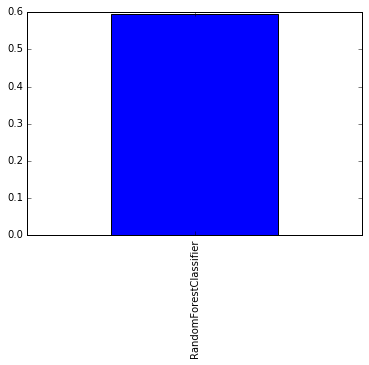

In [28]:
pd.DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

In [32]:
model_rfc.fit(train_features, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
result = result.drop(['country'], axis=1)
result.insert(1, 'country', model_rfc.predict(test.drop(['id'], axis=1)))

In [45]:
result.to_csv('ans_1.csv', index=False)